In [1]:
import pickle

import sys 
sys.path.append("../code")

from clustering import Clustering

# Load Data
사용 데이터는 전처리를 끝낸 임베딩벡터와 리뷰데이터이다. 만약 저장된 파일이 없다면 `script`폴더에 있는 쉘파일을 사용하여 전처리를 끝낸 후 파일을 저장되면 실행할 수 있다.

```bash
$ bash preprocessing.sh
```

In [2]:
embed_matrix = pickle.load(open('../saved_file/new_pre_embed_word_pos.pickle','rb'))
words = pickle.load(open('../saved_file/new_pre_text_word_pos.pickle','rb'))

# K-means Clustering

In [3]:
cluster_k = Clustering(embed_matrix, words)

## Optimal K Determination

최적의 k를 구하기위해 1부터 9까지 kmeans를 실행한 후 clustering 결과마다 Inertia 값을 비교하여 그 차이가 줄어드는 지점의 k로 결정한다.

$$Inertia = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)$$

여기서 $K$는 클러스터 수이고 $C_k$는 $k$번째 클러스터에 속하는 데이터의 집합, $\mu_k$는 $k$번째 클러스터의 중심위치, $d$는 $x_i$, $\mu_k$ 두 데이터 사이의 거리(distance) 혹은 비유사도(dissimilarity)로 정의한다.

내용 출처: https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/

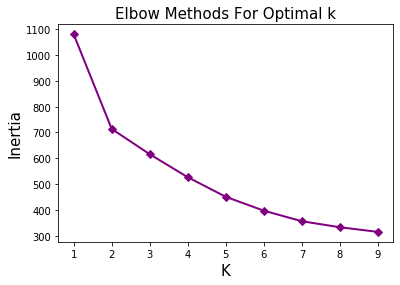

In [4]:
cluster_k.clustering_arms(titlesize=15, labelsize=15)

## Visualization K-means Cluster Analysis Results

적절한 군집수는 6으로 결정했고 각 결과에 대해 시각화하기 위해서 차원축소 방법 중 하나인 주성분분석(Principle Component Analysis)를 사용한다. 임베딩 벡터 차원 수를 시각화할 수 있도록 2차원으로 축소 후 클래스별로 산점도를 그렸다.

군집2의 경우 군집0,3과 유사한 점이 많고 군집 4의 경우 수가 적고 다른 군집과 섞여있었다. 더 정확한 해석을 하기위해 각 군집별 리뷰데이터를 워드클라우드로 확인한다.

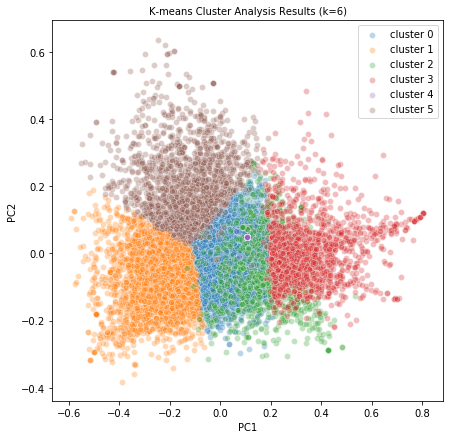

In [5]:
cluster_k.fit(k=6, figsize=(7,7))

## Visualization Reviews by Cluster Using WordCloud

각 군집별 특징을 워드클라우드로 보았을 때 우선 군집 4의 경우 NT(No Token)라는 단어가 가장 크고 단어 수가 비교적 적음을 알 수 있다. 이는 전처리 과정에서 형태소 분석시 추출된 단어가 없는 경우 NT(No Token)로 처리했기 때문이다. 군집4는 제외하고 다른 군집들에 대해서 각각 해석하도록한다.

**군집 해석**
- **신사의 품격**(군집 0)
    - 주 키워드는 사용/피부/느낌이며 주로 바르는 화장품과 관련된 내용있었다. 사용감, 즉 촉감에 예민한 사람들을 위한 화장품들이 모여있다. 끈적거림을 싫어하는 사람이라면 이 군집을 화장품을 살펴보도록 하자.
- **가뭄의 단비**(군집 1)
    - 군집 1과 유사해보이지만 촉촉/건조/수분/크림과 같은 키워드가 더 많이 보인다. 리뷰별 상품들을 확인했을 때 주로 피부 유형이 건성인 사람들을 위한 화장품들이 모여있다. 추운 겨울 건조한 피부 때문에 고민이라면 이 군집의 화장품을 보는게 좋다.
- **홀애비탈출키트**(군집 2)
    - 주 키워드는 냄새/향수/아빠/선물 이다. 인상 깊은 리뷰는 "아빠와 남동생이 덕분에 더이상 냄새가 나지않아요" 였다. 지옥철 한가운데에서 유난히 내 주변에만 사람이 한가한편이라면 이 군집에 있는 화장품들을 살펴보는게 좋을듯 하다.
- **미용실가지뫄**(군집 3)
    - 주 키워드는 가격/사용/머리/고정 이다. 남자의 생명은 머리라는 말도 있다. 남자들이 가장 많이 찾는 카테고리를 고르자면 헤어스타일링을 빼놓을 수가 없다. 여름에 비바람이 불고 겨울에 찬바람이 불어도 끄떡없는 헤어제품을 원한다면 이 군집에 있는 제품들을 보자.
- **피부영세시대**(군집5)
    - 이 군집은 피부영세시대라 쓰고 피부young세시대 또는 피부0세시대라고 읽는다. 자극에 예민하거나 피부에 트러블이 많아서 고민이 많다면 다시 아기피부로 돌아가기위해 이 군집의 제품들을 보는것을 추천한다.

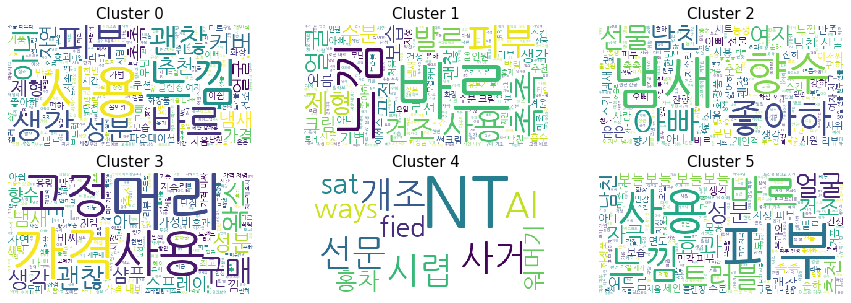

In [7]:
cluster_k.wordcloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', figsize=(15,5), titlesize=15)